# Replication Peeters and Van Ours (2021)
This notebook includes all the code I used to replicate the main findings of Peeters and Van Ours (2021). Furthermore, the original data is tweaked a bit.

In [64]:
import os
import pandas as pd
import statsmodels.formula.api as smf

In [65]:
data = pd.read_stata(filepath_or_buffer=os.path.join('repository', 'seasonalHAEngland.dta'))

In [66]:
data.head(5)

,team,year,stadname,manager,id,homegopro,homegoag,awaygopro,awaygoag,homewin,...,totalHPD,H_godif,H_win,H_points,HA_godif,HA_win,HA_points,AB_godif,AB_win,AB_points
0,Derby,1974,Baseball Ground,,35.0,40.0,16.0,12.0,26.0,13.0,...,369.0,11.476191,5.857143,17.571428,1.32619,0.607143,1.821429,-0.175000,-0.034091,-0.102273
1,Manchester United,1974,Old Trafford,Tommy Docherty,58.0,23.0,20.0,15.0,28.0,7.0,...,369.0,11.476191,5.857143,17.571428,0.22619,0.207143,0.621429,-0.079545,-0.197727,-0.593182
2,Queens Park Rangers,1974,Loftus Road,Gordon Jago,77.0,30.0,17.0,26.0,35.0,8.0,...,369.0,11.476191,5.857143,17.571428,0.52619,0.157143,0.471429,0.088636,0.077273,0.231818
3,West Ham,1974,Upton Park,Ron Greenwood,101.0,36.0,32.0,19.0,28.0,7.0,...,369.0,11.476191,5.857143,17.571428,0.07619,-0.042857,-0.128571,0.109091,0.040909,0.122727
4,Everton,1974,Goodison Park,Billy Bingham,37.0,29.0,14.0,21.0,34.0,12.0,...,369.0,11.476191,5.857143,17.571428,0.82619,0.607143,1.821429,-0.106818,-0.125000,-0.375000


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4140 entries, 0 to 4139
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team         4140 non-null   object 
 1   year         4140 non-null   int16  
 2   stadname     4140 non-null   object 
 3   manager      4140 non-null   object 
 4   id           4140 non-null   float32
 5   homegopro    4140 non-null   float32
 6   homegoag     4140 non-null   float32
 7   awaygopro    4140 non-null   float32
 8   awaygoag     4140 non-null   float32
 9   homewin      4140 non-null   float32
 10  homeloss     4140 non-null   float32
 11  homedraw     4140 non-null   float32
 12  awaywin      4140 non-null   float32
 13  awayloss     4140 non-null   float32
 14  awaydraw     4140 non-null   float32
 15  division     4140 non-null   float32
 16  wage         3337 non-null   float64
 17  rev          3423 non-null   float64
 18  avhomeatt    2852 non-null   float32
 19  avaway

## All data

In [68]:
data.loc[(data['division']==1,), 'avatt'].mean()

28642.155816435432

In [69]:
data.loc[(data['division']==2,), 'avatt'].mean()

14124.170313986679

In [70]:
data.loc[(data['division']==3,), 'avatt'].mean()

6490.600925925926

In [71]:
data.loc[(data['division']==4,), 'avatt'].mean()

3824.0774253731342

In [72]:
data.groupby('team')['HA_points'].mean()

team
AFC Wimbledon    0.187182
Accrington       0.543478
Aldershot        0.951710
Arsenal          0.636937
Aston Villa      0.574769
                   ...   
Workington       0.364625
Wrexham          0.599696
Wycombe          0.209043
Yeovil           0.428459
York             0.552724
Name: HA_points, Length: 114, dtype: float32

In [73]:
arsenal = data.loc[data['team']=='Arsenal']
arsenal.head(7)

,team,year,stadname,manager,id,homegopro,homegoag,awaygopro,awaygoag,homewin,...,totalHPD,H_godif,H_win,H_points,HA_godif,HA_win,HA_points,AB_godif,AB_win,AB_points
14,Arsenal,1974,Highbury,Bertie Mee,3.0,23.0,16.0,26.0,35.0,9.0,...,369.0,11.476191,5.857143,17.571428,0.226190,0.107143,0.321429,0.102273,0.079545,0.238636
34,Arsenal,1975,Highbury,Bertie Mee,3.0,31.0,16.0,16.0,33.0,10.0,...,396.0,13.952381,6.285714,18.857143,0.902381,0.435714,1.307143,-0.179545,-0.188636,-0.565909
64,Arsenal,1976,Highbury,Bertie Mee,3.0,33.0,19.0,14.0,34.0,11.0,...,369.0,11.523809,5.857143,17.571428,1.123810,0.507143,1.521429,-0.436364,-0.256818,-0.770455
82,Arsenal,1977,Highbury,Terry Neill,3.0,37.0,20.0,27.0,39.0,11.0,...,465.0,15.380953,7.380952,22.142857,0.680952,0.280952,0.842857,0.122727,0.050000,0.150000
91,Arsenal,1978,Highbury,Terry Neill,3.0,38.0,12.0,22.0,25.0,14.0,...,348.0,11.952381,5.523809,16.571428,0.852381,0.423810,1.271429,0.368182,0.140909,0.422727
123,Arsenal,1979,Highbury,Terry Neill,3.0,37.0,18.0,24.0,30.0,11.0,...,300.0,10.238095,4.761905,14.285714,0.738095,0.361905,1.085714,0.159091,0.063636,0.190909
141,Arsenal,1980,Highbury,Terry Neill,3.0,24.0,12.0,28.0,24.0,8.0,...,384.0,13.571428,6.095238,18.285715,-0.278571,-0.304762,-0.914286,0.811364,0.518182,1.554546


In [74]:
arsenal.mean(numeric_only=True)

year           1.996000e+03
id             3.000000e+00
homegopro      3.748889e+01
homegoag       1.606667e+01
awaygopro      2.697778e+01
awaygoag       2.395555e+01
homewin        1.211111e+01
homeloss       2.711111e+00
homedraw       5.000000e+00
awaywin        7.644444e+00
awayloss       6.733333e+00
awaydraw       5.444445e+00
division       1.000000e+00
wage           5.290070e+07
rev            1.114886e+08
avhomeatt      1.880869e+04
avawayatt      1.415268e+04
avatt          4.029667e+04
stadcap        5.194384e+04
newstadyear    1.937800e+03
newstaddum     2.222222e-02
rank           4.911111e+00
played         3.964444e+01
points         6.675555e+01
teams          2.082222e+01
manidfe        2.293171e+02
mdavatt        2.883716e+04
mdwage         3.132960e+07
mdrev          5.548055e+07
myavatt        1.275156e+04
mwage          1.413678e+07
mrev           2.328712e+07
relatt         3.133357e-01
relawayatt    -6.521454e-01
relwage        4.006798e-01
relrev         4.244

### Home advantage per club

In [75]:
season_counts_per_team = data['team'].value_counts()
seasons_45_teams_filter = season_counts_per_team==45
seasons_45_teams = season_counts_per_team.loc[seasons_45_teams_filter].index.to_list()
data_45_seasons = data[data['team'].isin(seasons_45_teams)]

In [76]:
point_advantage_per_team = data_45_seasons.groupby('team')['HA_points'].mean()
goal_advantage_per_team = data_45_seasons.groupby('team')['HA_godif'].mean()

In [77]:
point_advantage_per_team.to_clipboard()
point_advantage_per_team.head(7)

team
Arsenal        0.636937
Aston Villa    0.574769
Barnsley       0.681984
Birmingham     0.552822
Blackburn      0.594582
Blackpool      0.651840
Bolton         0.826921
Name: HA_points, dtype: float32

In [78]:
goal_advantage_per_team.to_clipboard()
goal_advantage_per_team.head(7)

team
Arsenal        0.466487
Aston Villa    0.383414
Barnsley       0.442870
Birmingham     0.328345
Blackburn      0.478158
Blackpool      0.453184
Bolton         0.526060
Name: HA_godif, dtype: float32

In [79]:
data.sort_values(by=['team', 'year'], inplace=True)
data['promoted'] = False
data['relegated'] = False
data['promoted'] = data['division'] < data['division'].shift(1)
data['relegated'] = data['division'] > data['division'].shift(1)

In [80]:
data[['team', 'year', 'division', 'promoted', 'relegated']].head(15)

,team,year,division,promoted,relegated
3992,AFC Wimbledon,2012,4.0,False,False
4009,AFC Wimbledon,2013,4.0,False,False
4025,AFC Wimbledon,2014,4.0,False,False
4056,AFC Wimbledon,2015,4.0,False,False
4078,AFC Wimbledon,2016,4.0,False,False
3027,AFC Wimbledon,2017,3.0,True,False
3060,AFC Wimbledon,2018,3.0,False,False
3855,Accrington,2007,4.0,False,True
3895,Accrington,2008,4.0,False,False
3913,Accrington,2009,4.0,False,False


In [81]:
pl_data = data.loc[data['division']==1]
model = smf.ols(formula='AB_godif ~ relwage + AP + promoted + relegated', data=pl_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               AB_godif   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     230.7
Date:                Sat, 17 Jun 2023   Prob (F-statistic):          1.32e-110
Time:                        14:41:38   Log-Likelihood:                -540.02
No. Observations:                 891   AIC:                             1088.
Df Residuals:                     887   BIC:                             1107.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0865      0.01

## Custom data

In [82]:
time_filter = data['year'] >= 2010
data = data.loc[time_filter]
division_filter = data['division'] == 1
data = data.loc[division_filter]

In [83]:
data.head(15)

,team,year,stadname,manager,id,homegopro,homegoag,awaygopro,awaygoag,homewin,...,H_win,H_points,HA_godif,HA_win,HA_points,AB_godif,AB_win,AB_points,promoted,relegated
766,Arsenal,2010,Emirates Stadium,Arsene Wenger,3.0,48.0,15.0,35.0,26.0,15.0,...,5.368421,16.105263,0.640351,0.368421,1.105263,1.041667,0.300000,0.900000,False,False
784,Arsenal,2011,Emirates Stadium,Arsene Wenger,3.0,33.0,15.0,39.0,28.0,11.0,...,4.684210,14.052631,-0.111111,-0.093567,-0.280702,1.005556,0.438889,1.316667,False,False
801,Arsenal,2012,Emirates Stadium,Arsene Wenger,3.0,39.0,17.0,35.0,32.0,12.0,...,2.894737,8.684211,0.640351,0.228070,0.684211,0.491667,0.233333,0.700000,False,False
822,Arsenal,2013,Emirates Stadium,Arsene Wenger,3.0,47.0,23.0,25.0,14.0,11.0,...,3.157895,9.473684,0.368421,-0.064327,-0.192982,0.850000,0.461111,1.383333,False,False
841,Arsenal,2014,Emirates Stadium,Arsene Wenger,3.0,36.0,11.0,32.0,30.0,13.0,...,2.947368,8.842105,0.856725,0.225146,0.675439,0.436111,0.386111,1.158333,False,False
868,Arsenal,2015,Emirates Stadium,Arsene Wenger,3.0,41.0,14.0,30.0,22.0,12.0,...,3.000000,9.000000,0.631579,0.111111,0.333333,0.750000,0.394444,1.183333,False,False
888,Arsenal,2016,Emirates Stadium,Arsene Wenger,3.0,31.0,11.0,34.0,25.0,12.0,...,2.157895,6.473684,0.295322,0.157895,0.473684,0.719444,0.300000,0.900000,False,False
908,Arsenal,2017,Emirates Stadium,Arsene Wenger,3.0,39.0,16.0,38.0,28.0,14.0,...,4.105263,12.315789,0.283626,0.327485,0.982456,0.880556,0.288889,0.866667,False,False
918,Arsenal,2018,Emirates Stadium,Arsene Wenger,3.0,54.0,20.0,20.0,31.0,15.0,...,3.421053,10.263158,2.073099,0.921053,2.763158,-0.269444,-0.225000,-0.675000,False,False
773,Aston Villa,2010,Villa Park,Martin O'Neill,4.0,29.0,16.0,23.0,23.0,8.0,...,5.368421,16.105263,0.029240,-0.242690,-0.728070,0.622222,0.480556,1.441667,False,False


In [84]:
data = data[['team', 'year', 'manager', 'avatt', 'HA_godif', 'HA_points']]

In [85]:
data.head()

,team,year,manager,avatt,HA_godif,HA_points
766,Arsenal,2010,Arsene Wenger,59927.0,0.640351,1.105263
784,Arsenal,2011,Arsene Wenger,60025.0,-0.111111,-0.280702
801,Arsenal,2012,Arsene Wenger,60000.0,0.640351,0.684211
822,Arsenal,2013,Arsene Wenger,60079.0,0.368421,-0.192982
841,Arsenal,2014,Arsene Wenger,60013.0,0.856725,0.675439


### Figure 1: Average attendance PL

In [86]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.ioff()

In [87]:
average_attendance_per_season = data.groupby('year')['avatt'].mean()
season_strings = [f'{x-1}/{x}' for x in average_attendance_per_season.index.to_list()]

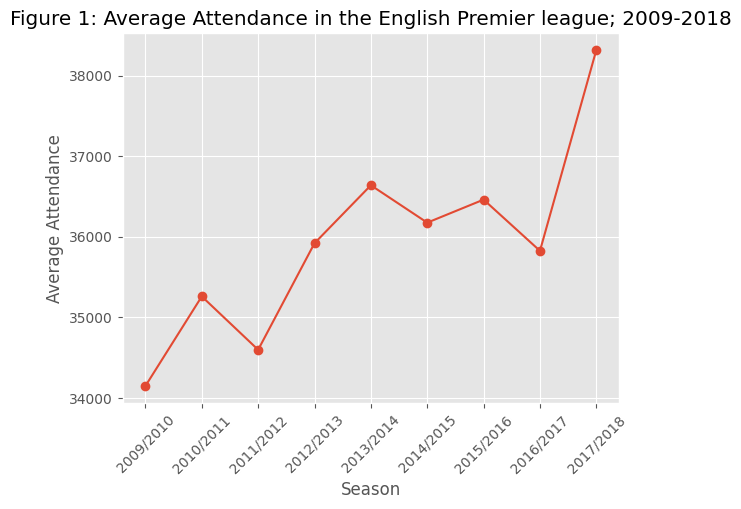

Average Attendance: 35927.97222222222


In [88]:
plt.plot(season_strings, average_attendance_per_season.values, marker='o')
plt.xlabel('Season')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.title('Figure 1: Average Attendance in the English Premier league; 2009-2018')
# plt.tight_layout()
plt.savefig('average_attendance_per_season.png', format='png', bbox_inches='tight')
plt.show()
print(f'Average Attendance: {data["avatt"].mean()}')

In [89]:
average_attendance_per_season

year
2010    34150.60
2011    35261.20
2012    34599.60
2013    35920.85
2014    36639.45
2015    36175.70
2016    36461.35
2017    35826.35
2018    38316.65
Name: avatt, dtype: float64

### Figure 2: Absolute Home Advantage EPL 2009-2018

In [90]:
hpa_per_season = data.groupby('year')['HA_points'].mean()
hga_per_season = data.groupby('year')['HA_godif'].mean()

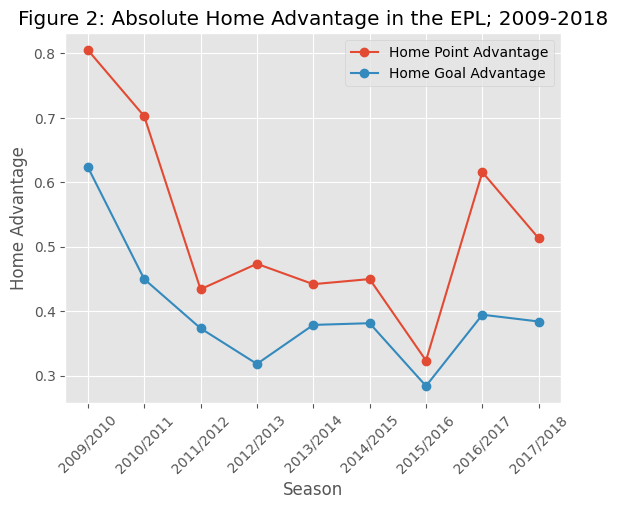

Average Home Point Advantage: 0.5289473533630371
Average Home Goal Advantage: 0.398830384016037


In [91]:
plt.plot(season_strings, hpa_per_season.values, hga_per_season.values, marker='o')
plt.xlabel('Season')
plt.ylabel('Home Advantage')
plt.xticks(rotation=45)
plt.title('Figure 2: Absolute Home Advantage in the EPL; 2009-2018')
plt.legend(['Home Point Advantage', 'Home Goal Advantage'])
# plt.tight_layout()
plt.savefig('absolute_home_advantage_per_season.png', format='png', bbox_inches='tight')
plt.show()
print(f'Average Home Point Advantage: {data["HA_points"].mean()}')
print(f'Average Home Goal Advantage: {data["HA_godif"].mean()}')

### Table 1: Average Home Advantage for all clubs in the EPL; 2009-2018

In [92]:
hpa_per_team = data.groupby('team')['HA_points'].mean()
hga_per_team = data.groupby('team')['HA_godif'].mean()

In [93]:
hpa_per_team.to_clipboard()
hpa_per_team.head(7)

team
Arsenal        0.727095
Aston Villa   -0.124060
Birmingham     0.995614
Blackburn      0.836257
Blackpool     -0.614035
Bolton         0.447368
Bournemouth    0.239766
Name: HA_points, dtype: float32

In [94]:
hga_per_team.to_clipboard()
hga_per_team.head(7)

team
Arsenal        0.630929
Aston Villa    0.212615
Birmingham     0.403509
Blackburn      0.852827
Blackpool      0.000000
Bolton         0.167641
Bournemouth    0.198830
Name: HA_godif, dtype: float32

In [95]:
division_count_per_team = data.groupby('team')['team'].value_counts()
division_count_per_team.to_clipboard()
division_count_per_team.head(7)

team         team       
Arsenal      Arsenal        9
Aston Villa  Aston Villa    7
Birmingham   Birmingham     2
Blackburn    Blackburn      3
Blackpool    Blackpool      1
Bolton       Bolton         3
Bournemouth  Bournemouth    3
Name: team, dtype: int64

### Home Advantage in points vs goals

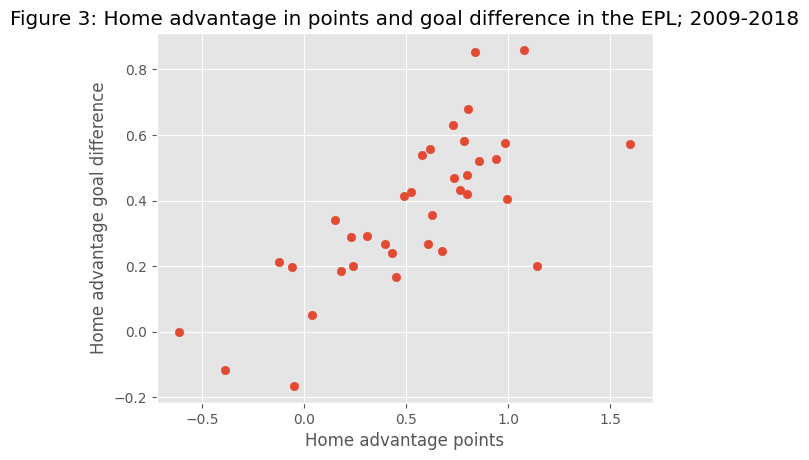

In [96]:
plt.scatter( hpa_per_team.values, hga_per_team.values)
plt.xlabel('Home advantage points')
plt.ylabel('Home advantage goal difference')
plt.title('Figure 3: Home advantage in points and goal difference in the EPL; 2009-2018')
# plt.tight_layout()
plt.savefig('home_advantage_point_vs_goal.png', format='png', bbox_inches='tight')
plt.show()